## Importing Library

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

## Loading Data

In [42]:
df = pd.read_csv("data/Housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
df.shape

(20640, 10)

## Data Exploration

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [46]:
df.dropna(inplace=True)

In [47]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [48]:
df.shape

(20433, 10)

In [49]:
X = df.drop(["median_house_value"],axis=1)
y = df["median_house_value"]

In [50]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [52]:
train_data = X_train.join(y_train)

In [53]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1306,-121.83,37.99,23.0,1150.0,174.0,572.0,174.0,4.9167,INLAND,152400.0
12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,NEAR BAY,213500.0
15010,-117.03,32.75,24.0,7879.0,1655.0,3898.0,1534.0,3.0897,NEAR OCEAN,187300.0
12977,-121.32,38.67,31.0,2532.0,479.0,1396.0,467.0,4.0417,INLAND,114500.0
1188,-121.55,39.44,31.0,1434.0,283.0,811.0,289.0,1.7727,INLAND,49000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

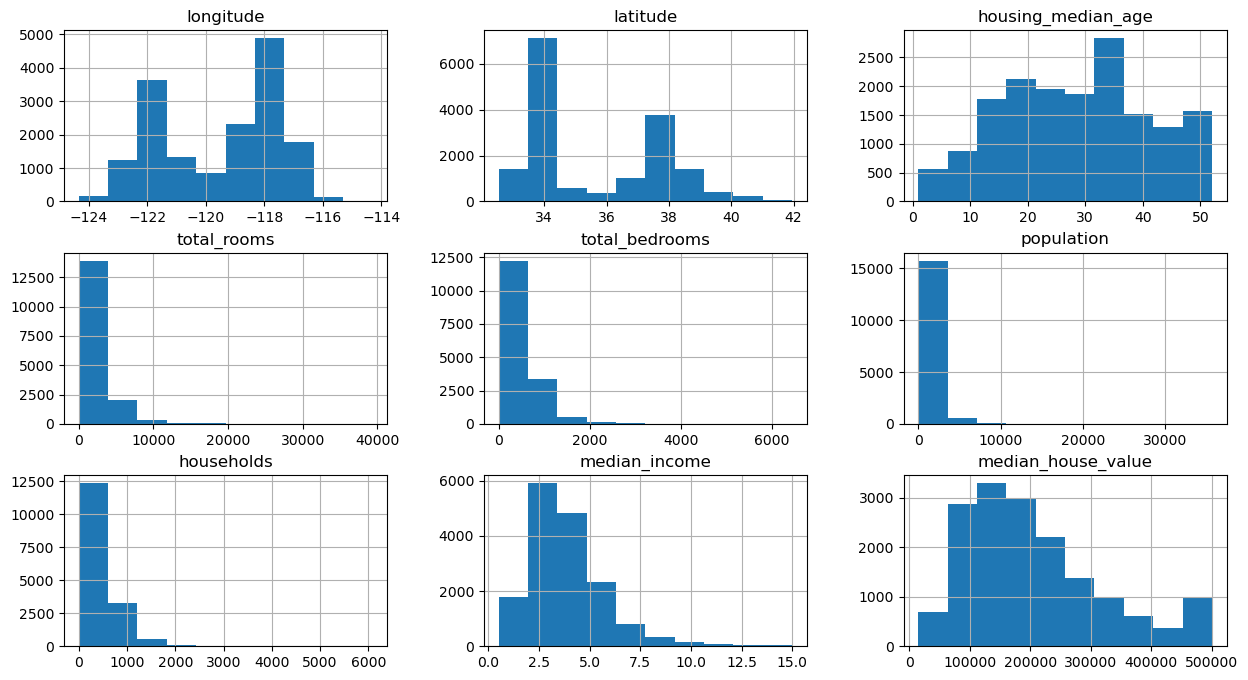

In [54]:
train_data.hist(figsize=(15,8))

C:\Users\mohammad\AppData\Local\Temp\ipykernel_18036\2405447373.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

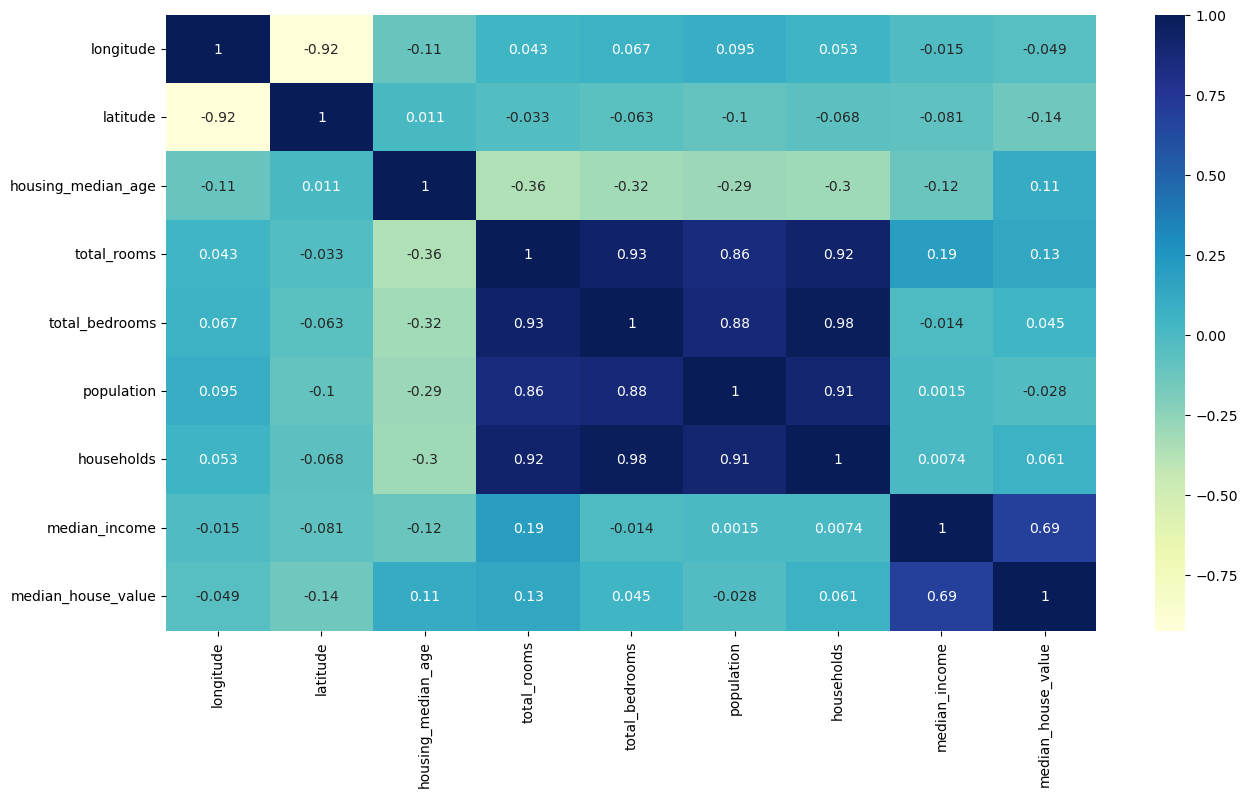

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [56]:
train_data["total_rooms"] = np.log(train_data["total_rooms"]+1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"]+1)
train_data["population"] = np.log(train_data["population"]+1)
train_data["households"] = np.log(train_data["households"]+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

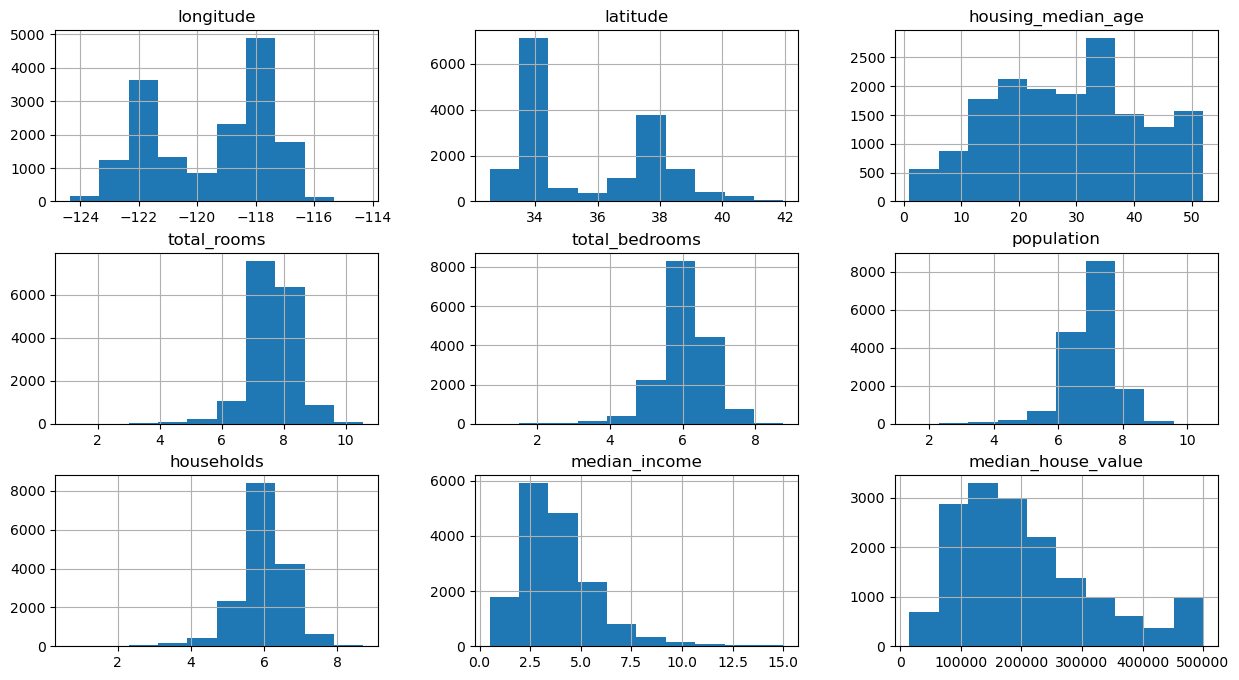

In [57]:
train_data.hist(figsize=(15,8))

In [58]:
 train_data.ocean_proximity.value_counts()

<1H OCEAN     7210
INLAND        5223
NEAR OCEAN    2073
NEAR BAY      1837
ISLAND           3
Name: ocean_proximity, dtype: int64

In [59]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"],axis=1)

<Axes: >

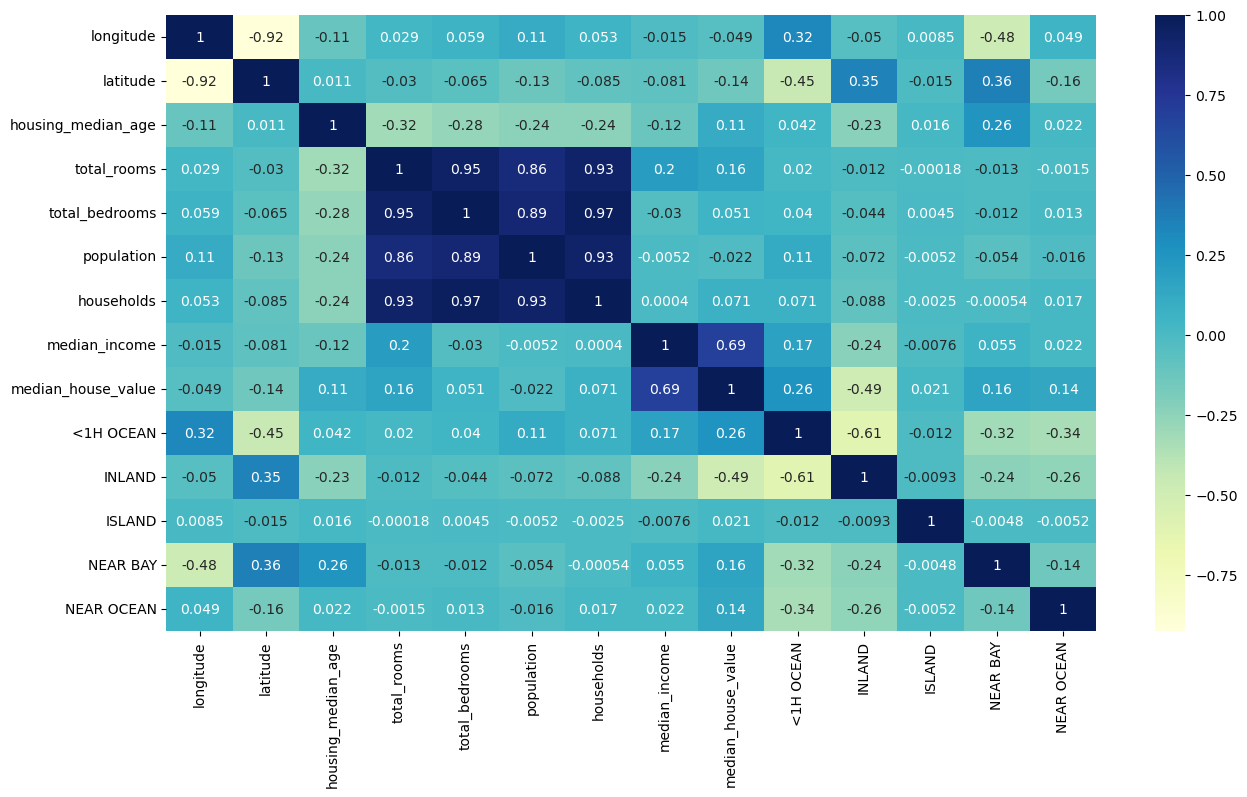

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

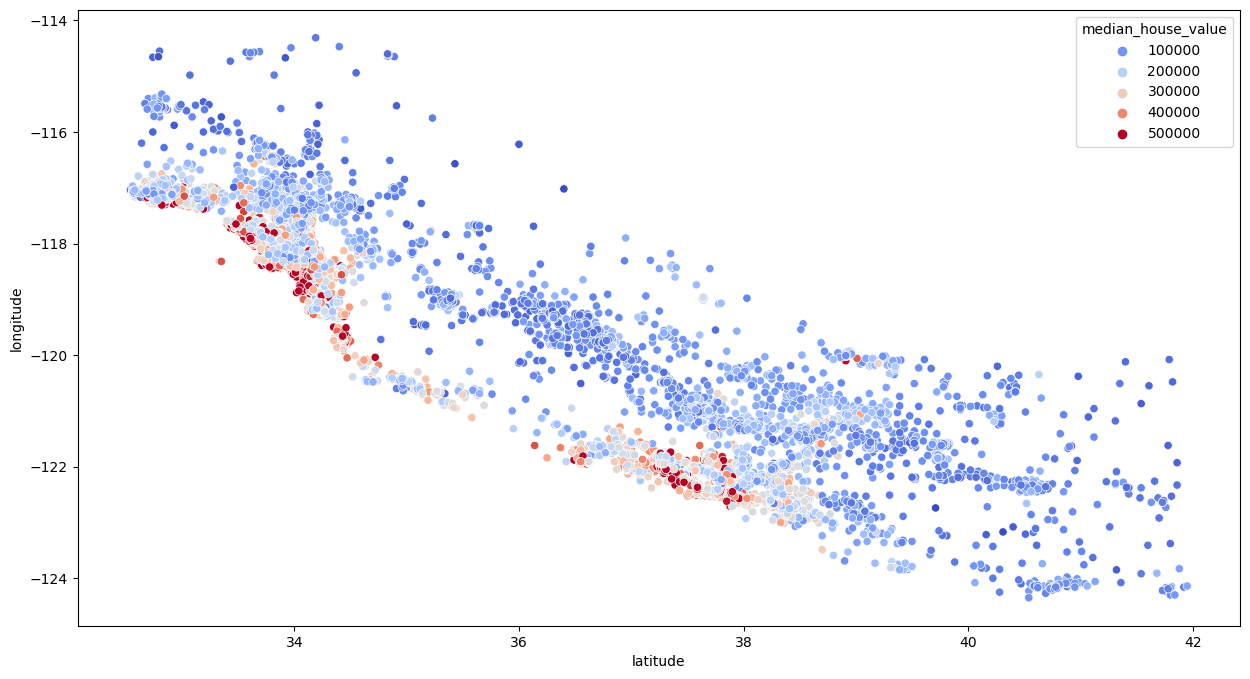

In [61]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "latitude",y = "longitude",data = train_data,hue="median_house_value",palette="coolwarm")

## Feature Engineering

In [62]:
train_data["bedroom_ration"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_room"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

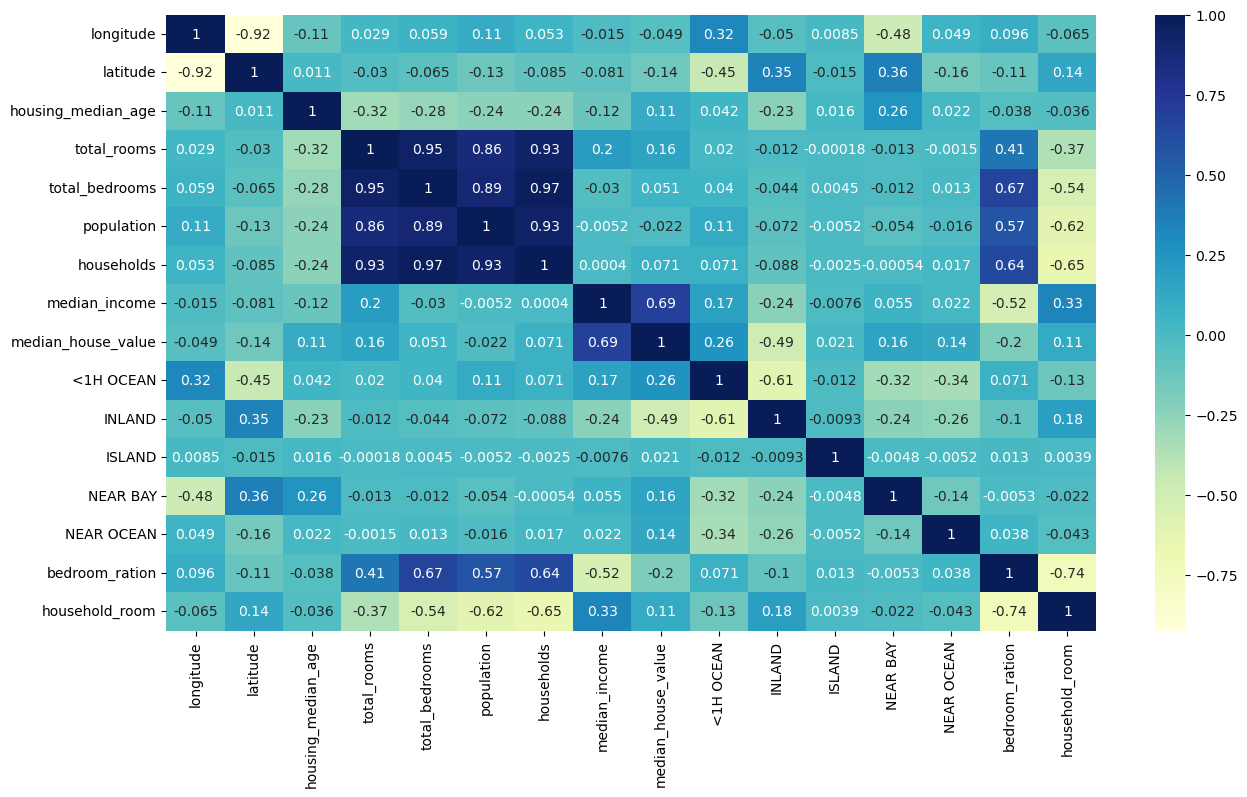

In [63]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

## Model Building

In [64]:
scaler = StandardScaler()

In [65]:
X_train, y_train = train_data.drop(["median_house_value"],axis=1), train_data["median_house_value"]
X_train_s = scaler.fit_transform(X_train)

In [66]:
reg = LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [67]:
test_data = X_test.join(y_test)

In [68]:
test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

In [69]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"],axis=1)

In [70]:
test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_room"] = test_data["total_rooms"] / test_data["households"]

In [71]:
X_test, y_test = test_data.drop(["median_house_value"],axis=1), test_data["median_house_value"]

In [73]:
X_test_s = scaler.fit_transform(X_test)

In [74]:
X_train_s

array([[-1.12422744,  1.09860856, -0.45235427, ..., -0.38110269,
        -1.63008712,  1.05810664],
       [-1.33863045,  1.03310961,  1.85140171, ..., -0.38110269,
        -0.11330751, -0.12278817],
       [ 1.2691085 , -1.35292343, -0.37291441, ...,  2.62396466,
         0.93093886, -0.73873656],
       ...,
       [-1.28378316,  0.98164615,  1.61308212, ..., -0.38110269,
        -0.11985446,  0.11146558],
       [ 1.22423345, -1.2780675 , -1.64395218, ..., -0.38110269,
         1.43612883, -1.13154247],
       [-1.58295016,  1.2951054 , -0.92899343, ..., -0.38110269,
        -0.01046543, -0.32374911]])

In [75]:
reg.score(X_test_s,y_test)

0.6651615685797289

In [78]:
reg_2 = SGDRegressor(learning_rate='constant', eta0=0.00001, max_iter=1000)
reg_2.fit(X_train_s,y_train)

SGDRegressor(eta0=1e-05, learning_rate='constant')

In [79]:
reg_2.score(X_test_s,y_test)

0.6622416294073268

In [111]:
reg_3 = SGDRegressor(penalty=None ,tol=1e-5, alpha=0.0001,eta0=0.0001,n_iter_no_change=100,random_state=42, max_iter=1000000)
reg_3.fit(X_train_s,y_train)

SGDRegressor(eta0=0.0001, max_iter=1000000, n_iter_no_change=100, penalty=None,
             random_state=42, tol=1e-05)

In [110]:
reg_3.score(X_test_s,y_test)

0.6651431260699355